# Eddy Zhang / trtin1

## Research question/interestsI'm interested in whether there's a correlation between a developer's educational background and salary or whether their industrial or experience has a greater impact on their salary. 

In [1]:
import numpy as np
import pandas as pd
import project_functions2 as p2
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
df2021 = pd.read_csv('../data/raw/survey_results_public_2021.csv')

In [3]:
df2021.describe()

,ResponseId,CompTotal,ConvertedCompYearly
count,83439.000000,4.718300e+04,4.684400e+04
mean,41720.000000,2.119407e+69,1.184262e+05
std,24086.908893,4.603702e+71,5.272944e+05
min,1.000000,0.000000e+00,1.000000e+00
25%,20860.500000,1.600000e+04,2.702500e+04
50%,41720.000000,6.700000e+04,5.621100e+04
75%,62579.500000,1.400000e+05,1.000000e+05
max,83439.000000,1.000000e+74,4.524131e+07


In [4]:
df2021.tail()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
83434,83435,I am a developer by profession,Employed full-time,United States of America,Texas,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",6,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a concentration and/or memory disorder ...,Appropriate in length,Easy,160500.0
83435,83436,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Benin,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",4,...,18-24 years old,Man,No,Straight / Heterosexual,Black or of African descent,None of the above,None of the above,Appropriate in length,Easy,3960.0
83436,83437,I am a developer by profession,Employed full-time,United States of America,New Jersey,NaN,"Secondary school (e.g. American high school, G...",11 - 17 years,School,10,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,90000.0
83437,83438,I am a developer by profession,Employed full-time,Canada,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,Online Courses or Certification;Books / Physic...,5,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a mood or emotional disorder (e.g. depr...,Appropriate in length,Neither easy nor difficult,816816.0
83438,83439,I am a developer by profession,Employed full-time,Brazil,NaN,NaN,"Professional degree (JD, MD, etc.)",11 - 17 years,School,14,...,18-24 years old,Man,No,Straight / Heterosexual,Hispanic or Latino/a/x,None of the above,None of the above,Appropriate in length,Easy,21168.0


## Milestone 3 

### **Task1** : EDA


In [5]:
print(f"Number of rows and Columns: {df2021.shape}") 

Number of rows and Columns: (83439, 48)


In [6]:
print(f"Column names in the dataframe: {df2021.columns}") 

Column names in the dataframe: Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')


In [7]:
p2.groupby_EdLevel(df2021).describe

<bound method NDFrame.describe of                                              EdLevel  ResponseId  \
0                Associate degree (A.A., A.S., etc.)    93570200   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)  1467702331   
2    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   716789575   
3         Other doctoral degree (Ph.D., Ed.D., etc.)   109833722   
4                          Primary/elementary school   110100386   
5                 Professional degree (JD, MD, etc.)    52949737   
6  Secondary school (e.g. American high school, G...   407842719   
7  Some college/university study without earning ...   440038588   
8                                     Something else    70542563   

      CompTotal  ConvertedCompYearly  
0  2.942860e+09         1.492817e+08  
1  8.000000e+52         2.827211e+09  
2  1.000000e+29         1.406186e+09  
3  3.155575e+09         2.176770e+08  
4  6.678696e+09         7.014500e+07  
5  9.657713e+08         6.967081e+07  
6  1.183905e

In [8]:
df2021.describe(include='object').T

,count,unique,top,freq
MainBranch,83439,6,I am a developer by profession,58153
Employment,83323,9,Employed full-time,53584
Country,83439,181,United States of America,15288
US_State,14920,55,California,2163
UK_Country,4418,4,England,3915
EdLevel,83126,9,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",35357
Age1stCode,83243,9,11 - 17 years,44170
LearnCode,82963,458,School,7242
YearsCode,81641,52,5,6190
YearsCodePro,61216,52,3,5812


### **Task2-3** : Load and Clean Data

In [9]:
#Clean Dataset by removing irrelevent columns and N/A values from Edlevel, LearnCOde, ConvertedCompYearly and Employment
df2021Cleaned = p2.load_and_process('../data/raw/survey_results_public_2021.csv') 
df2021Cleaned['YearsCodePro'] = df2021Cleaned['YearsCodePro'].astype(int)
df2021Cleaned.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,CompTotal,CompFreq,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,ConvertedCompYearly
0,68927,I am a developer by profession,Employed full-time,Mexico,NaN,NaN,"Associate degree (A.A., A.S., etc.)",11 - 17 years,School,4,...,16500.0,Monthly,18-24 years old,Man,No,Straight / Heterosexual,Hispanic or Latino/a/x,None of the above,None of the above,10668.0
1,53541,I am a developer by profession,Employed full-time,Belarus,NaN,NaN,"Associate degree (A.A., A.S., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",3,...,2000.0,Monthly,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,24000.0
2,59408,I am a developer by profession,Employed full-time,United States of America,Georgia,NaN,"Associate degree (A.A., A.S., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",8,...,65000.0,Yearly,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,65000.0
3,45974,I am a developer by profession,Employed full-time,Brazil,NaN,NaN,"Associate degree (A.A., A.S., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",9,...,1900.0,Monthly,25-34 years old,Man,No,Straight / Heterosexual,Multiracial;Hispanic or Latino/a/x,None of the above,I have an anxiety disorder,5220.0
4,18446,I am a developer by profession,Employed part-time,Australia,NaN,NaN,"Associate degree (A.A., A.S., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,700.0,Weekly,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,23400.0


In [10]:
df2021Cleaned.describe(include='object').T

,count,unique,top,freq
MainBranch,46256,2,I am a developer by profession,42238
Employment,46243,5,Employed full-time,40115
Country,46256,171,United States of America,9784
US_State,9709,52,California,1264
UK_Country,2879,4,England,2555
EdLevel,46256,9,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",22233
Age1stCode,46249,9,11 - 17 years,25381
LearnCode,46256,433,School,4280
YearsCode,46174,52,10,4030
DevType,46172,6444,"Developer, full-stack",6408


### **Task4** : Analysis

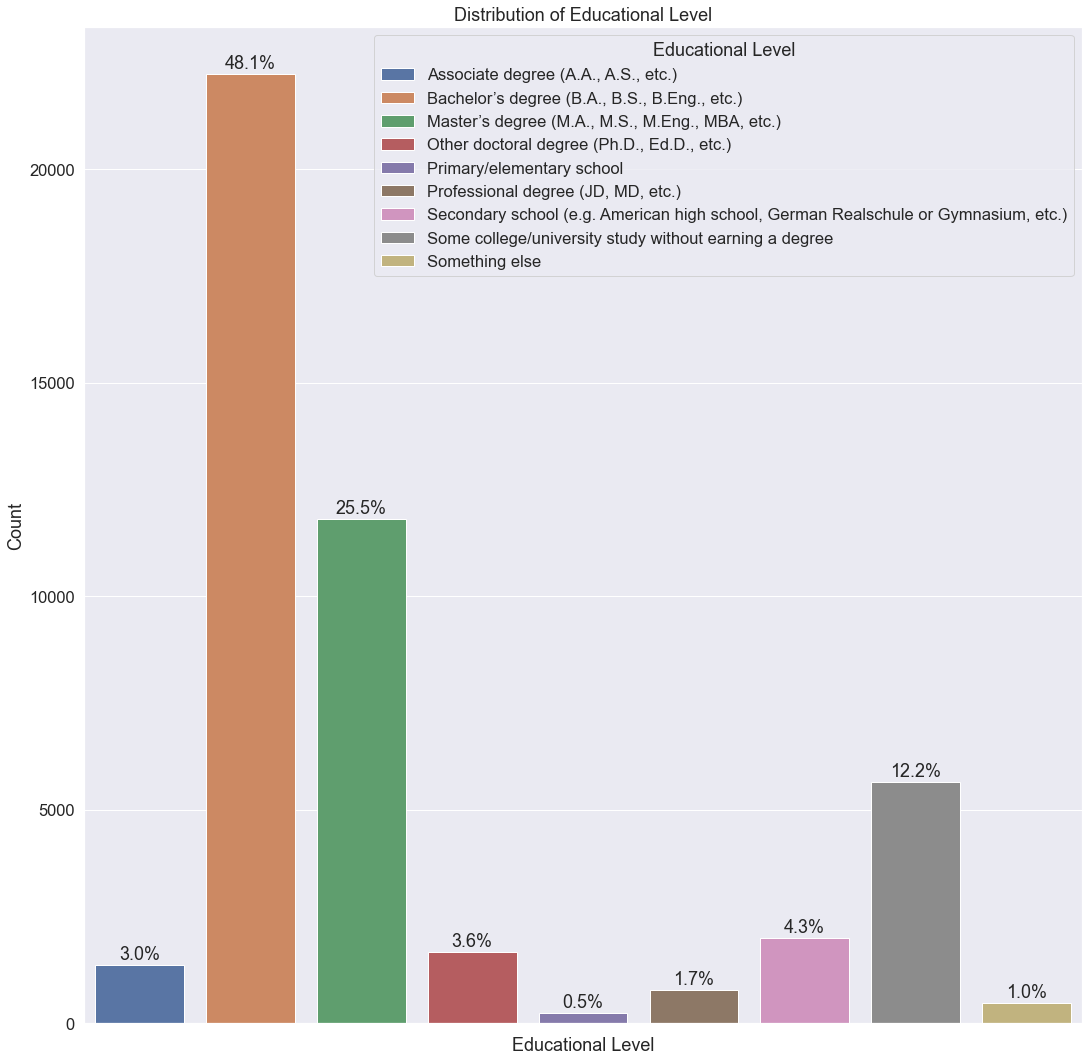

In [11]:
plt.rcParams['figure.figsize']=15,15
sns.set(font_scale = 1.5)
plt.xticks(rotation= 0)
plt.title("Distribution of Educational Level")
plt.tight_layout()
plt1 = sns.countplot(data = df2021Cleaned, x = df2021Cleaned.EdLevel, hue = 'EdLevel', dodge=False)
plt.legend(title = "Educational Level")
plt1.set_xlabel("Educational Level")
plt1.set_ylabel("Count")
plt1.set(xticklabels=[])

p2.show_Percentage(df2021Cleaned, plt1)

**observations**
* Almost half of the employed respondees have a bachelor's degree
* 92.4% of the respondees attempted or acquired an undergraduate or graduate degree
* 29.1% of the respondees acquired a graduate degree
* Only 0.5% of the respondess claim that primary school is their highest education level

Text(0, 0.5, 'Education Level')

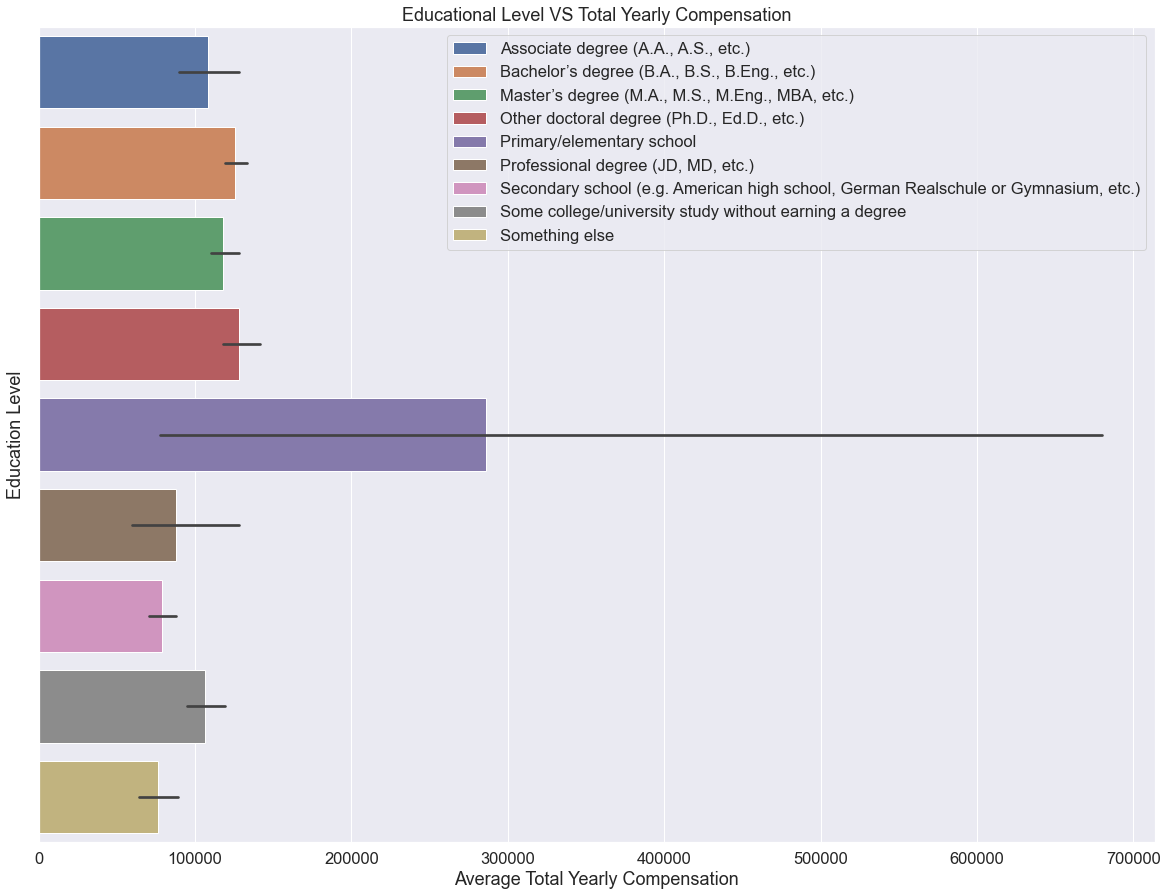

In [12]:
plt.rcParams['figure.figsize']=20,15
sns.set(font_scale = 1.5)
plt.xticks(rotation= 0)
plt.title("Educational Level VS Total Yearly Compensation")
plt2 = sns.barplot(data = df2021Cleaned, y='EdLevel',x='ConvertedCompYearly', hue = 'EdLevel', dodge=False, )
plt2.legend(title = "Educational Level")
plt2.legend(loc='upper right')
plt2.set_xlabel('Average Total Yearly Compensation')
plt2.set(yticklabels=[])
plt2.set_ylabel("Education Level")

**observations**
* The previous graph shows that only 0.5% of the respondess claim that primary school is their highest education level, but in this plot, respondess with an education level of primary school have the highest total average yearly compensation and also the longest error bar.
* This indicates that some respondess intentionally put extreme numbers when participating in the survey.

Text(0, 0.5, 'Education Level')

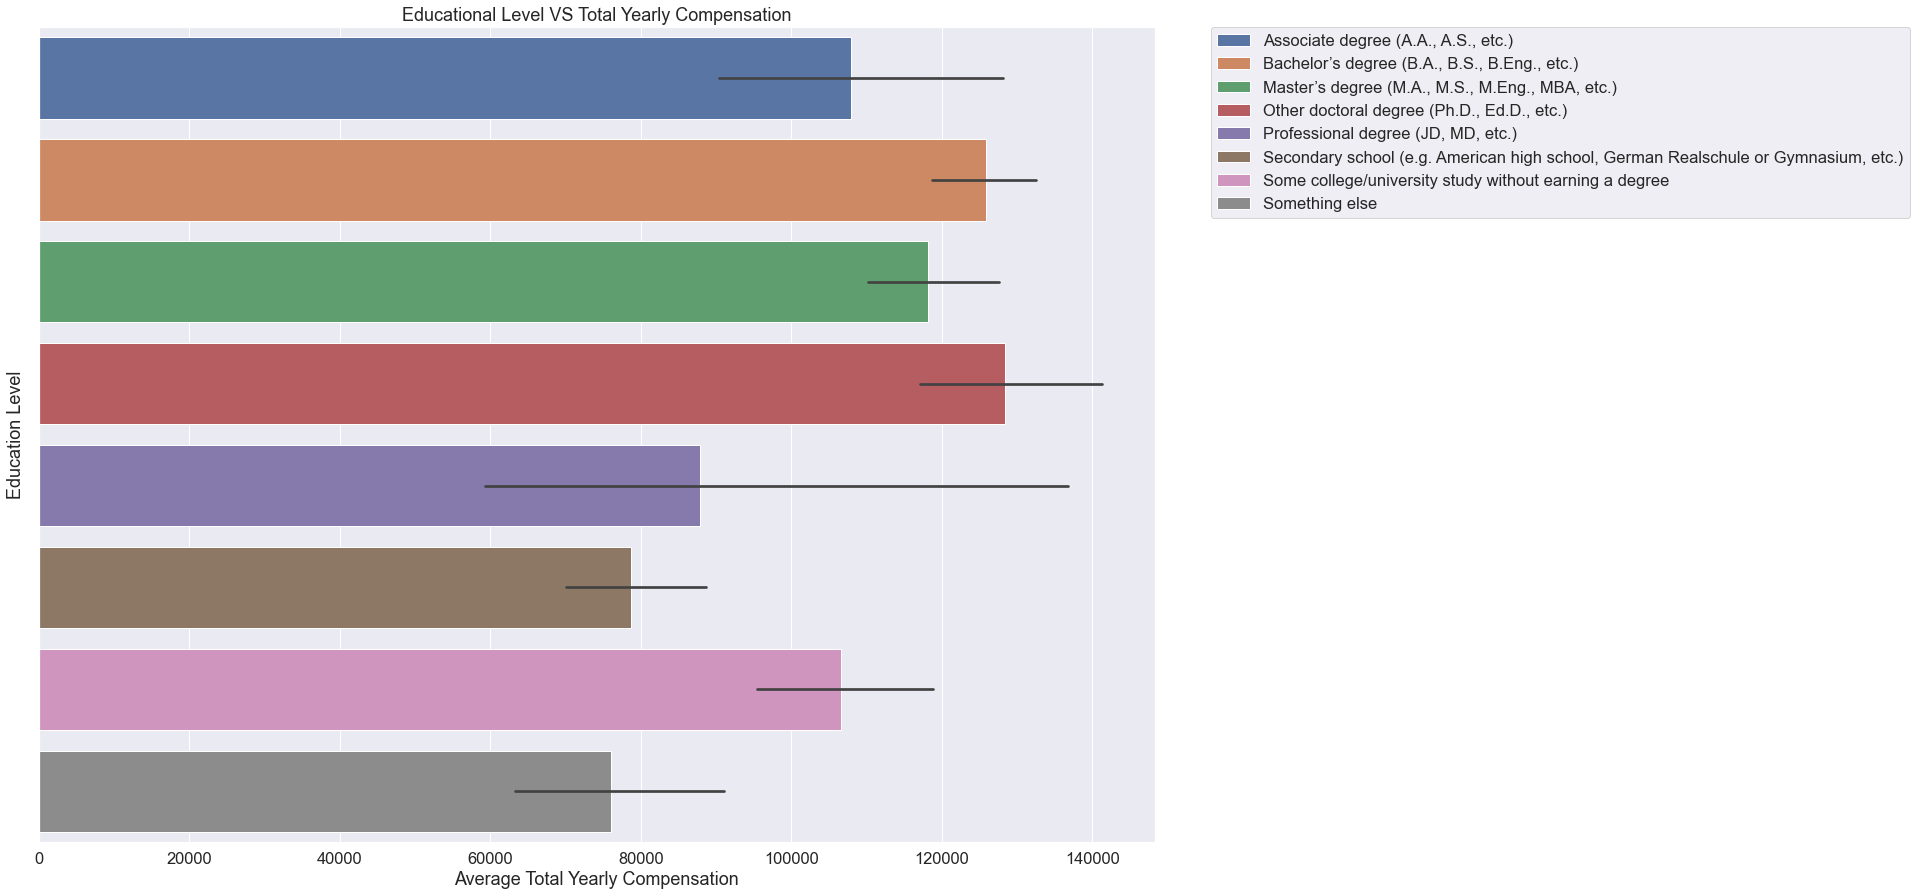

In [13]:
dfModiofied = df2021Cleaned.drop(df2021Cleaned[(df2021Cleaned.EdLevel == "Primary/elementary school")].index)
plt.rcParams['figure.figsize']=20,15
sns.set(font_scale = 1.5)
plt.xticks(rotation= 0)
plt.title("Educational Level VS Total Yearly Compensation")
plt2 = sns.barplot(data = dfModiofied, y='EdLevel',x='ConvertedCompYearly', hue = 'EdLevel', dodge=False, )
plt2.legend(title = "Education Level")
plt2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt2.set_xlabel('Average Total Yearly Compensation')
plt2.set(yticklabels=[])
plt2.set_ylabel("Education Level")

**observations**
* In order to conduct further analysis, all rows with EdLevel of primary school have been removed in the dataset.
* Generally speaking, respondees with some sort of post secondary back ground generally make more than those who don't
* Education level might not be the only factor contributing to how much one makes yearly.

Text(0, 0.5, 'Years of professional coding')

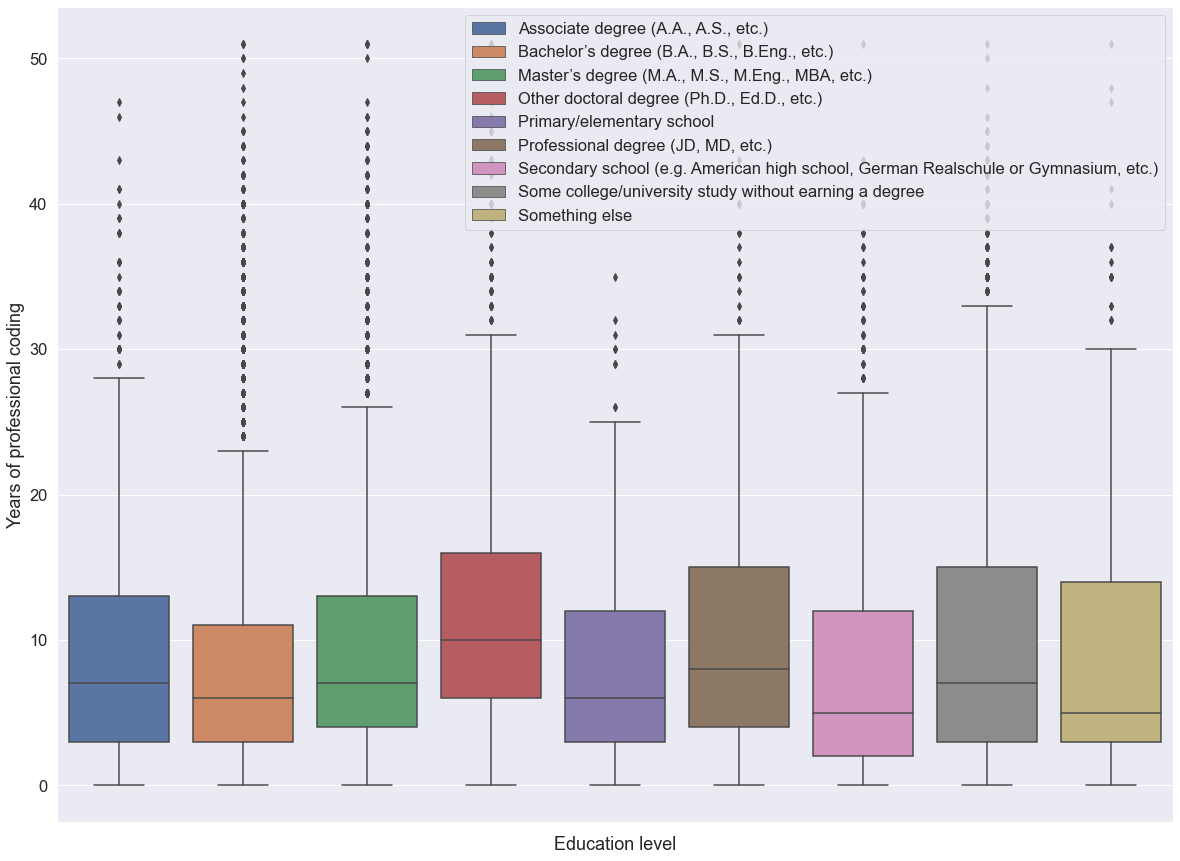

In [14]:
plt3 = sns.boxplot(data = df2021Cleaned, x = 'EdLevel',y = 'YearsCodePro',hue = 'EdLevel',dodge=False)
plt3.legend(loc='upper right')
plt3.set_xlabel('Education level')
plt3.set(xticklabels=[])
plt3.set_ylabel("Years of professional coding")

**observations**
* Respondees with a doctoral degree also have the highest average years coding professionally. This is somewhat surprising because they spend more years in schools than respondees with an undergraduate degree and potentially have less experience in the professional field.

Text(0, 0.5, 'Total yearly compensations')

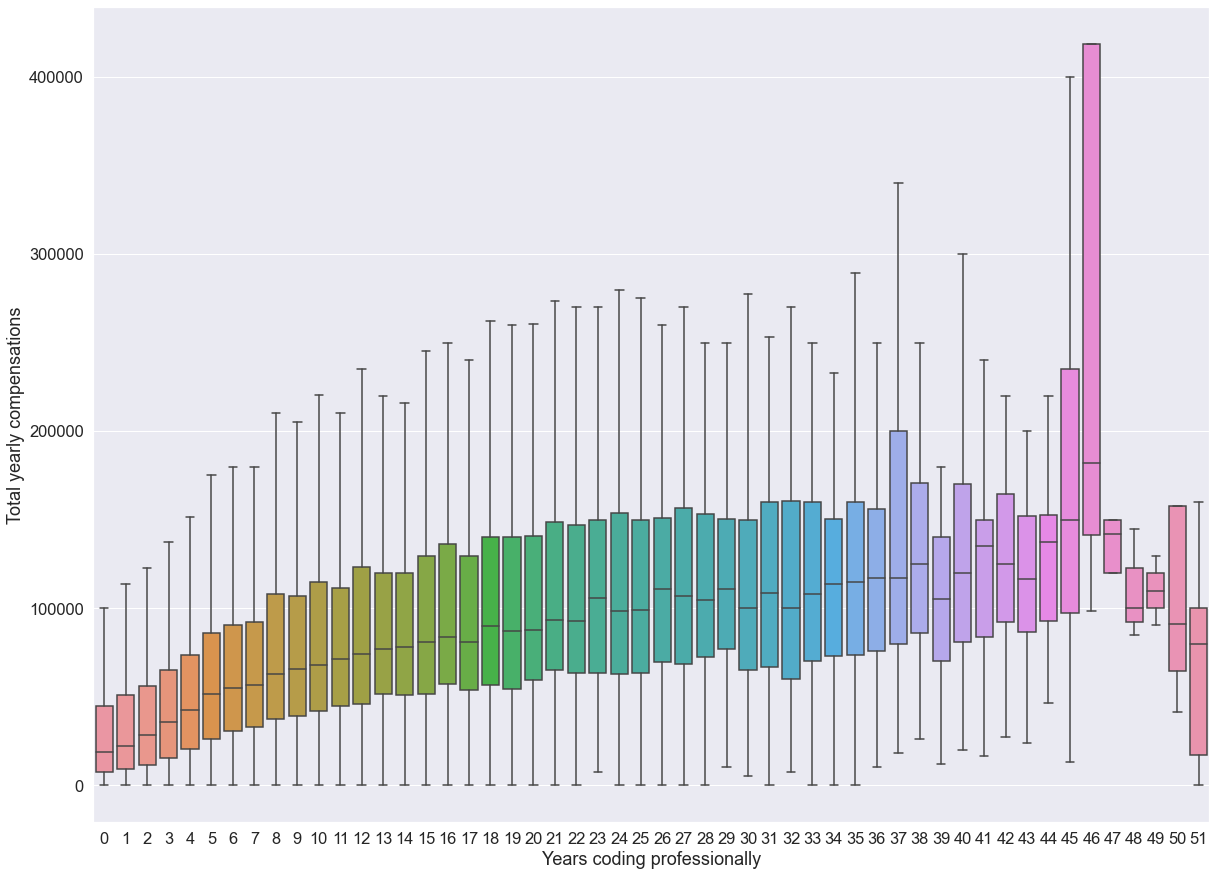

In [15]:
dfModiofied = df2021Cleaned.drop(df2021Cleaned[(df2021Cleaned.EdLevel == "Primary/elementary school")].index)
plt4 = sns.boxplot(data = dfModiofied,y='ConvertedCompYearly',x='YearsCodePro', showfliers = False)
plt4.set_xlabel('Years coding professionally')
plt4.set_ylabel("Total yearly compensations")

**observations**
* A positive correlation between professional experience and average salary
* Coders see the biggest amount of raises during the first 10 years of their professions
* Average salary sees a stagger beyond 25+ years of professional experience